# Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_short = pd.read_spss('Iren_1.sav', convert_categoricals=True)
print(df_short.head(40))

     Age  Height  Weight Living_area      Occupation Marittal_status  \
0   51.0   155.0    70.0       Urban       Housewife         Married   
1   35.0   152.0    56.0       Rural       Housewife         Married   
2   46.0   165.0    70.0       Urban  Service_holder         Married   
3   61.0   152.0    56.0       Rural       Housewife         Married   
4   50.0   152.0    62.0       Urban       Housewife         Married   
5   38.0   154.0    61.0       Rural       Housewife         Married   
6   48.0   152.0    72.0       Urban       Housewife         Married   
7   40.0   167.0    73.0       Urban       Housewife         Married   
8   33.0   160.0    81.0       Urban         Teacher         Married   
9   39.0   152.0    70.0       Urban       Housewife         Married   
10  48.0   170.0    79.0       Urban       Housewife         Married   
11  54.0   155.0    65.0       Urban       Housewife           Widow   
12  75.0   155.0    55.0       Urban       Housewife           W

In [3]:
df_short.columns

Index(['Age', 'Height', 'Weight', 'Living_area', 'Occupation',
       'Marittal_status', 'Family_size', 'Children', 'Educational_status',
       'Religion', 'Jorda', 'Past_medical_history', 'Duration', 'Surgery',
       'Pelvic_strength_pre_test', 'Abdominal_muscle_strength_pre_test',
       'Pelvic_floor_endurance_pre_test',
       'Abdominal_muscle_endurance_pre_test', 'How_often_leak_urine_pre_test',
       'Urine_usually_leak_pre_test', 'Interfere_daily_life_pre_test',
       'ICIQ_SF_Total_pre_test', 'When_urine_leak_pre_test',
       'Pelvic_strength_week_1', 'Abdominal_muscle_strength_week_1',
       'Pelvic_floor_endurance_week_1', 'Abdominal_muscle_endurance_week_1',
       'How_often_leak_urine_week_1', 'Urine_usually_leak_week_1',
       'Interefere_daily_life_week_1', 'ICIQ_SF_total_week_1',
       'when_urine_leak_week_1', 'Pelvic_strength_week_2',
       'Abdominal_muscle_strength_week_2', 'Pelvic_floor_endurance_week_2',
       'Abdominal_muscle_endurance_week_2', 'How_o

# Reestruturação do Dataset

In [4]:
df_short['patient_id'] = range(1, len(df_short) + 1)

In [5]:
df_short.rename(columns={
    'Interefere_daily_life_pre_test': 'Interfere_daily_life_pre_test',
    'ICIQ_SF_total_pre_test': 'ICIQ_SF_Total_pre_test',
    'when_urine_leak_week_1': 'When_urine_leak_week_1',
    'Interefere_daily_life_week_1': 'Interfere_daily_life_week_1',
    'Interefere_daily_life_week_2': 'Interfere_daily_life_week_2',
    'Interfere_daily_life_week_3': 'Interfere_daily_life_week_3',  # já correta
    'interfere_daily_life_week_3': 'Interfere_daily_life_week_3',  # se estiver assim
    'Interefere_daily_life_week_4': 'Interfere_daily_life_week_4',
    'ICIQ_SF_total_week_1': 'ICIQ_SF_Total_week_1',
    'ICIQ_SF_total_week_2': 'ICIQ_SF_Total_week_2',
    'ICIQ_SF_total_week_3': 'ICIQ_SF_Total_week_3',
    'ICIQ_SF_total_week_4': 'ICIQ_SF_Total_week_4',
}, inplace=True)


In [6]:
base_cols = ['patient_id','Age', 'Height', 'Weight', 'Past_medical_history', 'Duration', 'Surgery']

new_colnames = [
    'Pelvic_strength',
    'Abdominal_muscle_strength',
    'Pelvic_floor_endurance',
    'Abdominal_muscle_endurance',
    'How_often_leak_urine',
    'Urine_usually_leak',
    'Interfere_daily_life',
    'ICIQ_SF_total',
    'When_urine_leak'
]

weeks = {
    0: '_pre_test',
    1: '_week_1',
    2: '_week_2',
    3: '_week_3',
    4: '_week_4'
}

dfs = []

for week_label, suffix in weeks.items():
    week_cols = [
        f'Pelvic_strength{suffix}',
        f'Abdominal_muscle_strength{suffix}',
        f'Pelvic_floor_endurance{suffix}',
        f'Abdominal_muscle_endurance{suffix}',
        f'How_often_leak_urine{suffix}',
        f'Urine_usually_leak{suffix}',
        f'Interfere_daily_life{suffix}',
        f'ICIQ_SF_Total{suffix}',
        f'When_urine_leak{suffix}'
    ]

    temp_df = df_short[base_cols + week_cols].copy()
    temp_df.columns = base_cols + new_colnames
    temp_df['week'] = week_label
    dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)

len(df)


200

In [7]:
substituicoes = {
    'Leaks when you cough or sneeze': 'Leaks_when_you_cough_or_sneeze',
    'Leaks when you are physically active\\exercise': 'Leaks_when_you_are_physically_active',
    'Leaks when you finished urinating and dressed': 'Leaks_when_you_finished_urinating_and_dressed',
    'Never urine does not leak': 'Never_urine_does_not_leak'
}

df['When_urine_leak'] = df['When_urine_leak'].replace(substituicoes)

In [8]:
df['Urine_usually_leak'] = df['Urine_usually_leak'].replace({'A minimum ampunt': 'A_minimum_amount'})

In [9]:
df.head(5)

,patient_id,Age,Height,Weight,Past_medical_history,Duration,Surgery,Pelvic_strength,Abdominal_muscle_strength,Pelvic_floor_endurance,Abdominal_muscle_endurance,How_often_leak_urine,Urine_usually_leak,Interfere_daily_life,ICIQ_SF_total,When_urine_leak,week
0,1,51.0,155.0,70.0,HTN,520.0,Yes,2.0,2.0,6.0,14.0,About_once_a_week_or_less_often,A_minimum_amount,2.0,5.0,Leaks_when_you_cough_or_sneeze,0
1,2,35.0,152.0,56.0,HTN,20.0,No,1.0,3.0,9.0,22.0,Several_times_a_day,Large_amount,8.0,16.0,Leaks_when_you_cough_or_sneeze,0
2,3,46.0,165.0,70.0,DM,27.0,Yes,2.0,3.0,21.0,29.0,About_once_a_day,Large_amount,4.0,11.0,Leaks_when_you_cough_or_sneeze,0
3,4,61.0,152.0,56.0,DM,260.0,No,1.0,2.0,17.0,38.0,About_once_a_day,A_minimum_amount,3.0,8.0,Leaks_when_you_cough_or_sneeze,0
4,5,50.0,152.0,62.0,HTN,104.0,No,0.0,2.0,0.0,11.0,Several_times_a_day,A_minimum_amount,2.0,8.0,Leaks_when_you_cough_or_sneeze,0


In [10]:
df.columns

Index(['patient_id', 'Age', 'Height', 'Weight', 'Past_medical_history',
       'Duration', 'Surgery', 'Pelvic_strength', 'Abdominal_muscle_strength',
       'Pelvic_floor_endurance', 'Abdominal_muscle_endurance',
       'How_often_leak_urine', 'Urine_usually_leak', 'Interfere_daily_life',
       'ICIQ_SF_total', 'When_urine_leak', 'week'],
      dtype='object')

# Estudo das features

Past Medical Condition

 representam condições médicas pré-existentes que os(as) participantes do estudo já tinham antes da intervenção.

HTN → Hypertension (hipertensão arterial): pressão alta crônica.

DN → Diabetes Mellitus (provavelmente refere-se a "Diabetic Neuropathy" ou apenas "Diabetes").

More_than_one_condition → O(a) paciente possui mais de uma condição médica pré-existente (por exemplo, HTN e DN juntas).

Others → Outras condições médicas não especificadas (podem incluir, por exemplo, doenças respiratórias, cardíacas, etc.).

ICIQ_SF_total

**Avaliação da incontinência: **
 A incontinência urinária foi avaliada por meio do questionário International Consultation on Incontinence Questionnaire - Short Form (ICIQ-SF).
 Trata-se de um instrumento autorrelatado, válido e confiável.
 O questionário contém 4 perguntas sobre os sintomas ocorridos no último mês. A pontuação é feita com base na soma dos itens 3, 4 e 5 (os dois primeiros são perguntas demográficas).
 A pontuação varia de 0 a 21, sendo 0 o melhor resultado e 21 o pior.
 É válido para adultos de 18 a 64 anos e também para maiores de 65 anos.
 A confiabilidade teste-reteste é de 0,74, com coeficientes de correlação de 0,93 e 0,96.

Teste manual da força muscular:
 A força dos músculos do assoalho pélvico foi avaliada por teste manual com base no Sistema de Classificação de Oxford Modificado, desenvolvido por Laycock.
 A escala possui 6 pontos e é realizada por palpação vaginal. Os níveis são:
 0 = nenhuma contração
 1 = contração leve (flicker)
 2 = fraca
 3 = moderada
 4 = boa (com elevação)
 5 = forte
 Essa ferramenta é amplamente utilizada por fisioterapeutas por ser de baixo custo, apresentando alta confiabilidade entre avaliadores (κ = 0,33; IC 95%: 0,09–0,57).

Duration:

Provavelmente duração dos sintomas de incontinência em meses

# Tratamento de Outliers e valores faltantes

Estratégia: Removendo a linha

In [11]:
# Encontra os índices das linhas onde o valor é "Others" (insensível a maiúsculas)
indices_to_remove = df[df["Past_medical_history"].str.lower() == "others"].index

df = df.drop(indices_to_remove)

if df['Past_medical_history'].dtype.name == 'category':
    df['Past_medical_history'] = df['Past_medical_history'].cat.remove_unused_categories()

In [12]:
df[df["Past_medical_history"] == "Others"]

,patient_id,Age,Height,Weight,Past_medical_history,Duration,Surgery,Pelvic_strength,Abdominal_muscle_strength,Pelvic_floor_endurance,Abdominal_muscle_endurance,How_often_leak_urine,Urine_usually_leak,Interfere_daily_life,ICIQ_SF_total,When_urine_leak,week


In [13]:
len(df)

195

Coluna "Urine_usually_leak" contém muitos valores faltantes e errados ("2.0")

In [14]:
print(df['Urine_usually_leak'].value_counts(dropna=False))


Urine_usually_leak
2.0                  97
Large_amount         50
A_minimum_amount     17
None                 14
A_small_amount       13
A_moderate_amount     4
Name: count, dtype: int64


Estratégia: Criar categoria "Unknown"

In [15]:
df['Urine_usually_leak'] = df['Urine_usually_leak'].replace([2.0, 'None'], 'Unknown')

In [16]:
print(df['Urine_usually_leak'].value_counts(dropna=False))

Urine_usually_leak
Unknown              111
Large_amount          50
A_minimum_amount      17
A_small_amount        13
A_moderate_amount      4
Name: count, dtype: int64


# Histogramas

C:\Users\luana\AppData\Local\Temp\ipykernel_25060\2341739570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette="pastel")
C:\Users\luana\AppData\Local\Temp\ipykernel_25060\2341739570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette="pastel")
C:\Users\luana\AppData\Local\Temp\ipykernel_25060\2341739570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette

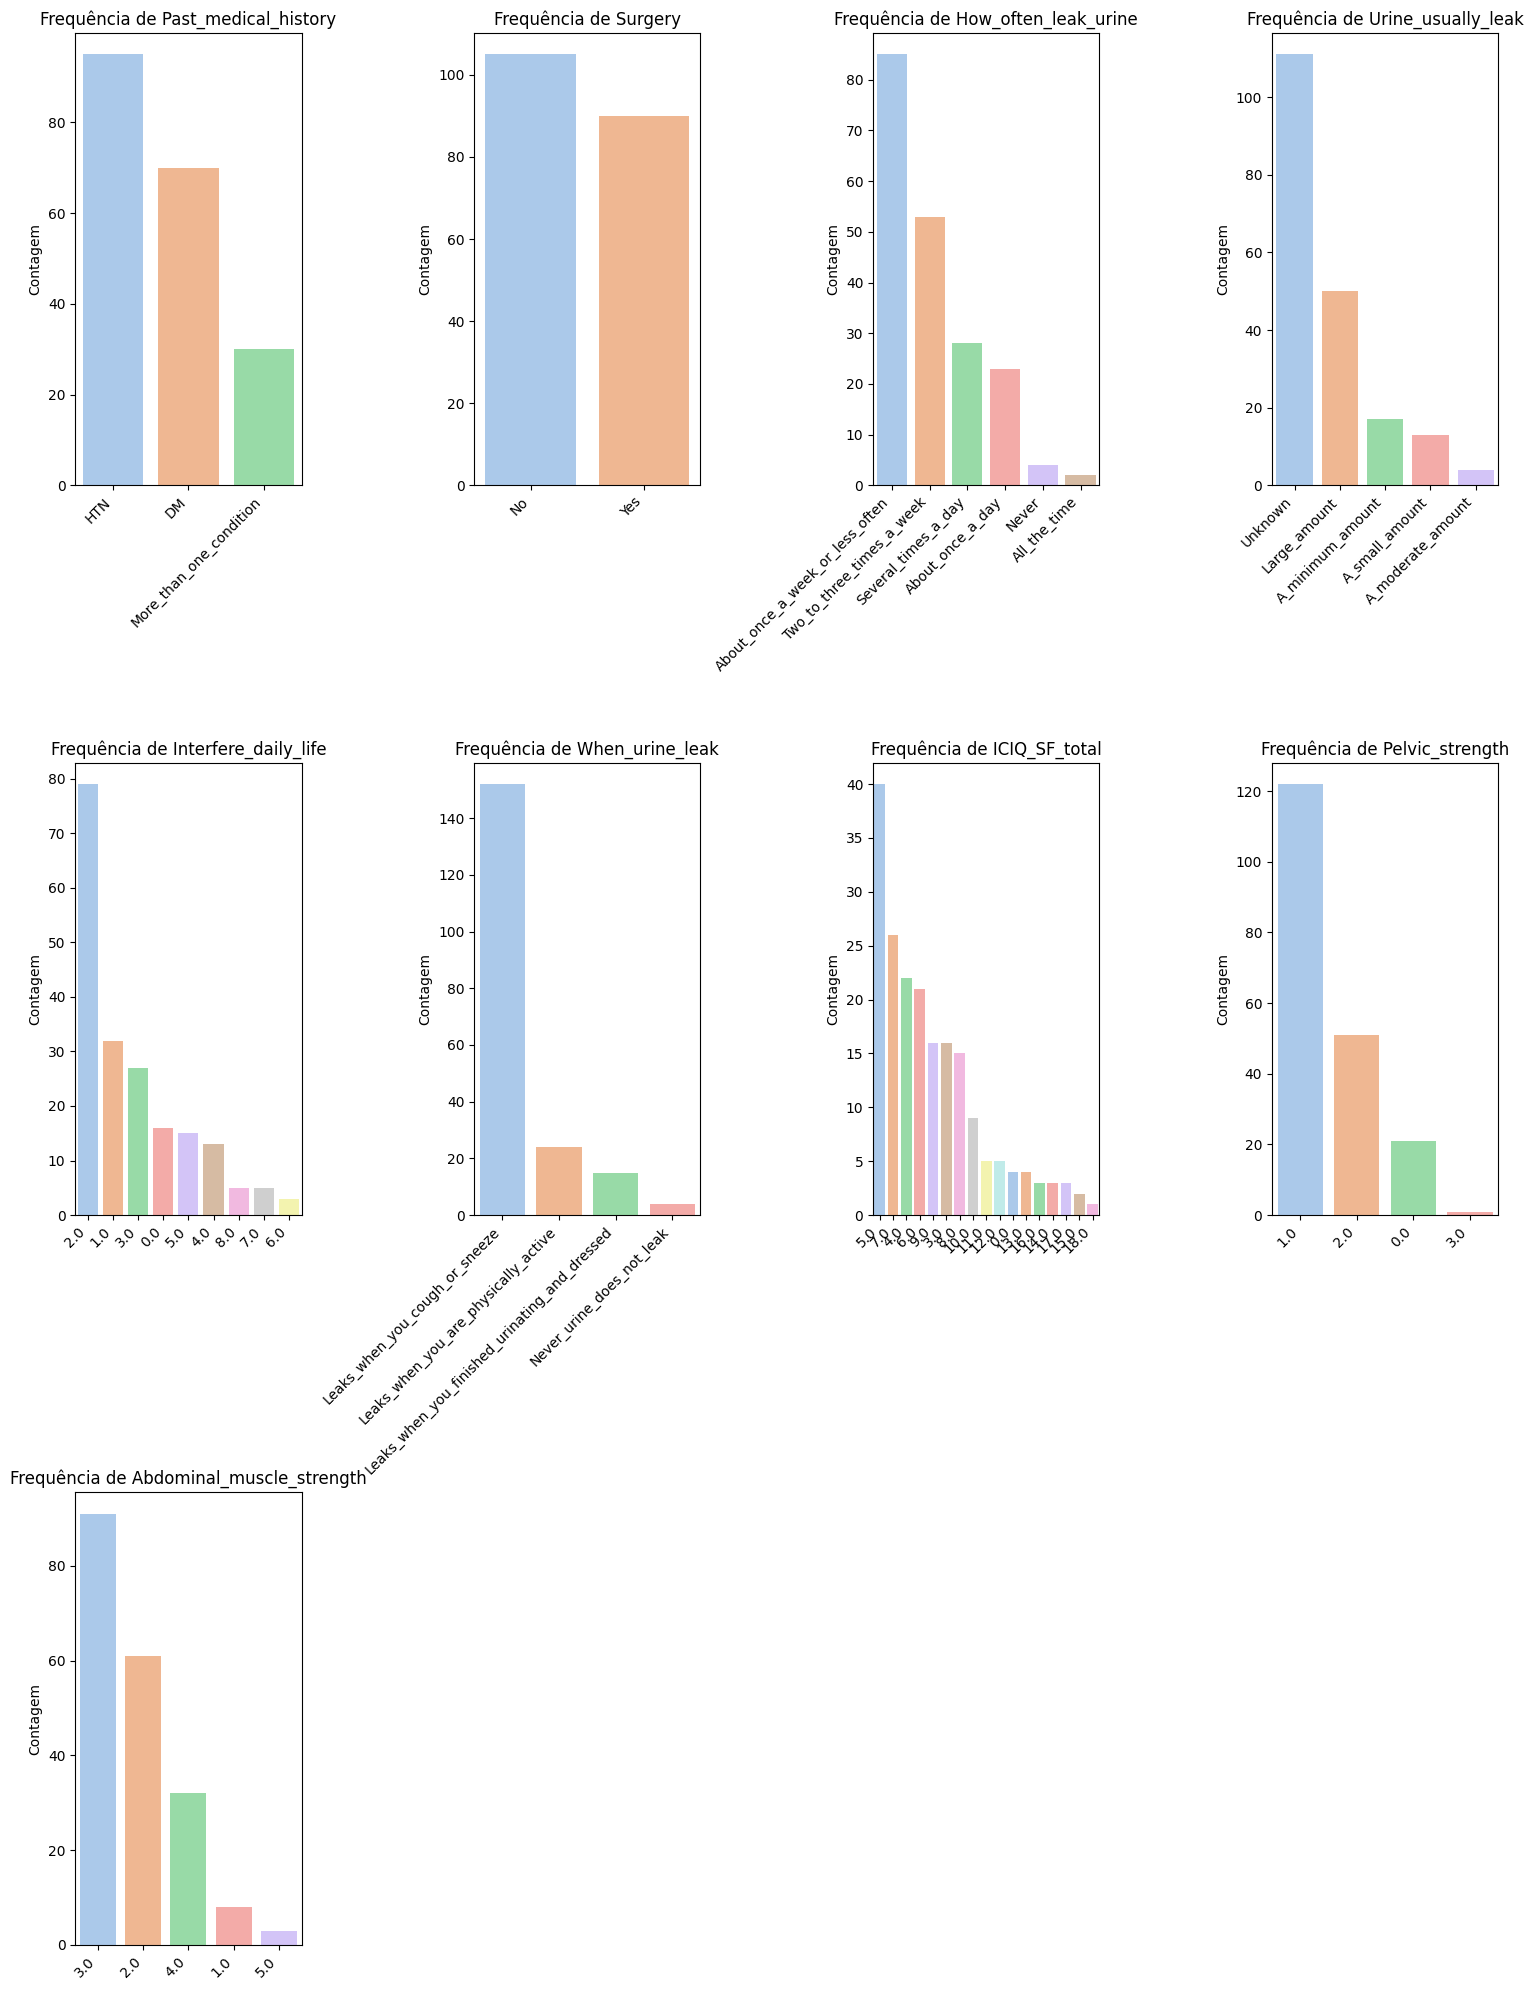

In [17]:
categorical_vars = [
    'Past_medical_history', 'Surgery', 'How_often_leak_urine',
    'Urine_usually_leak', 'Interfere_daily_life', 'When_urine_leak',
    'ICIQ_SF_total', 'Pelvic_strength', 'Abdominal_muscle_strength'
]

plt.figure(figsize=(15, 20))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3,4 , i)
    sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette="pastel")
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequência de {var}')
    plt.xlabel('')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

# Encoding

Label encoding (valores possuem ordem natural)

In [18]:
df['How_often_leak_urine'] = df['How_often_leak_urine'].map({'Never': 0, 'About_once_a_week_or_less_often': 1, 'Two_to_three_times_a_week': 2,
         'About_once_a_day': 3, 'Several_times_a_day':4, 'All_the_time':5})

One-hot encoding (sem ordem) - cria uma coluna para cada categoria da feature

In [19]:
df['Surgery'] = df['Surgery'].map({'No': 0, 'Yes': 1})

In [20]:
When_urine_leak_values = [
    'Leaks_when_you_cough_or_sneeze',
    'Leaks_when_you_are_physically_active',
    'Leaks_when_you_finished_urinating_and_dressed',
    'Never_urine_does_not_leak'
]
prefixo = 'When_urine_leak_'
for valor in When_urine_leak_values:
    nome_coluna = prefixo + valor
    df[nome_coluna] = (df['When_urine_leak'] == valor).astype(int)

df = df.drop(columns=['When_urine_leak'])





Past_medical_history_values = [
    'HTN',
    'DM',
    'More_than_one_condition',
]
prefixo = 'Past_medical_history_'
for valor in Past_medical_history_values:
    nome_coluna = prefixo + valor
    df[nome_coluna] = (df['Past_medical_history'] == valor).astype(int)

df = df.drop(columns=['Past_medical_history'])



Urine_usually_leak_values = [
    'Unknown',
    'Large_amount',
    'A_minimum_amount',
    'A_small_amount',
    'A_moderate_amount '
]
prefixo = 'Urine_usually_leak_'
for valor in Urine_usually_leak_values:
    nome_coluna = prefixo + valor
    df[nome_coluna] = (df['Urine_usually_leak'] == valor).astype(int)

df = df.drop(columns=['Urine_usually_leak'])

df=df.drop(columns='Urine_usually_leak_Unknown')


In [21]:
df.head(10)

,patient_id,Age,Height,Weight,Duration,Surgery,Pelvic_strength,Abdominal_muscle_strength,Pelvic_floor_endurance,Abdominal_muscle_endurance,...,When_urine_leak_Leaks_when_you_are_physically_active,When_urine_leak_Leaks_when_you_finished_urinating_and_dressed,When_urine_leak_Never_urine_does_not_leak,Past_medical_history_HTN,Past_medical_history_DM,Past_medical_history_More_than_one_condition,Urine_usually_leak_Large_amount,Urine_usually_leak_A_minimum_amount,Urine_usually_leak_A_small_amount,Urine_usually_leak_A_moderate_amount
0,1,51.0,155.0,70.0,520.0,1,2.0,2.0,6.0,14.0,...,0,0,0,1,0,0,0,1,0,0
1,2,35.0,152.0,56.0,20.0,0,1.0,3.0,9.0,22.0,...,0,0,0,1,0,0,1,0,0,0
2,3,46.0,165.0,70.0,27.0,1,2.0,3.0,21.0,29.0,...,0,0,0,0,1,0,1,0,0,0
3,4,61.0,152.0,56.0,260.0,0,1.0,2.0,17.0,38.0,...,0,0,0,0,1,0,0,1,0,0
4,5,50.0,152.0,62.0,104.0,0,0.0,2.0,0.0,11.0,...,0,0,0,1,0,0,0,1,0,0
5,6,38.0,154.0,61.0,520.0,0,1.0,2.0,13.0,9.0,...,0,0,0,1,0,0,1,0,0,0
6,7,48.0,152.0,72.0,52.0,1,1.0,3.0,43.0,18.0,...,0,0,0,1,0,0,1,0,0,0
7,8,40.0,167.0,73.0,52.0,0,1.0,2.0,11.0,9.0,...,1,0,0,0,1,0,1,0,0,0
8,9,33.0,160.0,81.0,208.0,1,2.0,3.0,30.0,39.0,...,1,0,0,0,1,0,1,0,0,0
9,10,39.0,152.0,70.0,104.0,1,0.0,2.0,5.0,7.0,...,0,0,0,1,0,0,1,0,0,0


In [22]:
df.columns

Index(['patient_id', 'Age', 'Height', 'Weight', 'Duration', 'Surgery',
       'Pelvic_strength', 'Abdominal_muscle_strength',
       'Pelvic_floor_endurance', 'Abdominal_muscle_endurance',
       'How_often_leak_urine', 'Interfere_daily_life', 'ICIQ_SF_total', 'week',
       'When_urine_leak_Leaks_when_you_cough_or_sneeze',
       'When_urine_leak_Leaks_when_you_are_physically_active',
       'When_urine_leak_Leaks_when_you_finished_urinating_and_dressed',
       'When_urine_leak_Never_urine_does_not_leak', 'Past_medical_history_HTN',
       'Past_medical_history_DM',
       'Past_medical_history_More_than_one_condition',
       'Urine_usually_leak_Large_amount',
       'Urine_usually_leak_A_minimum_amount',
       'Urine_usually_leak_A_small_amount',
       'Urine_usually_leak_A_moderate_amount '],
      dtype='object')

# Scatter Plots e Matriz de Correlação

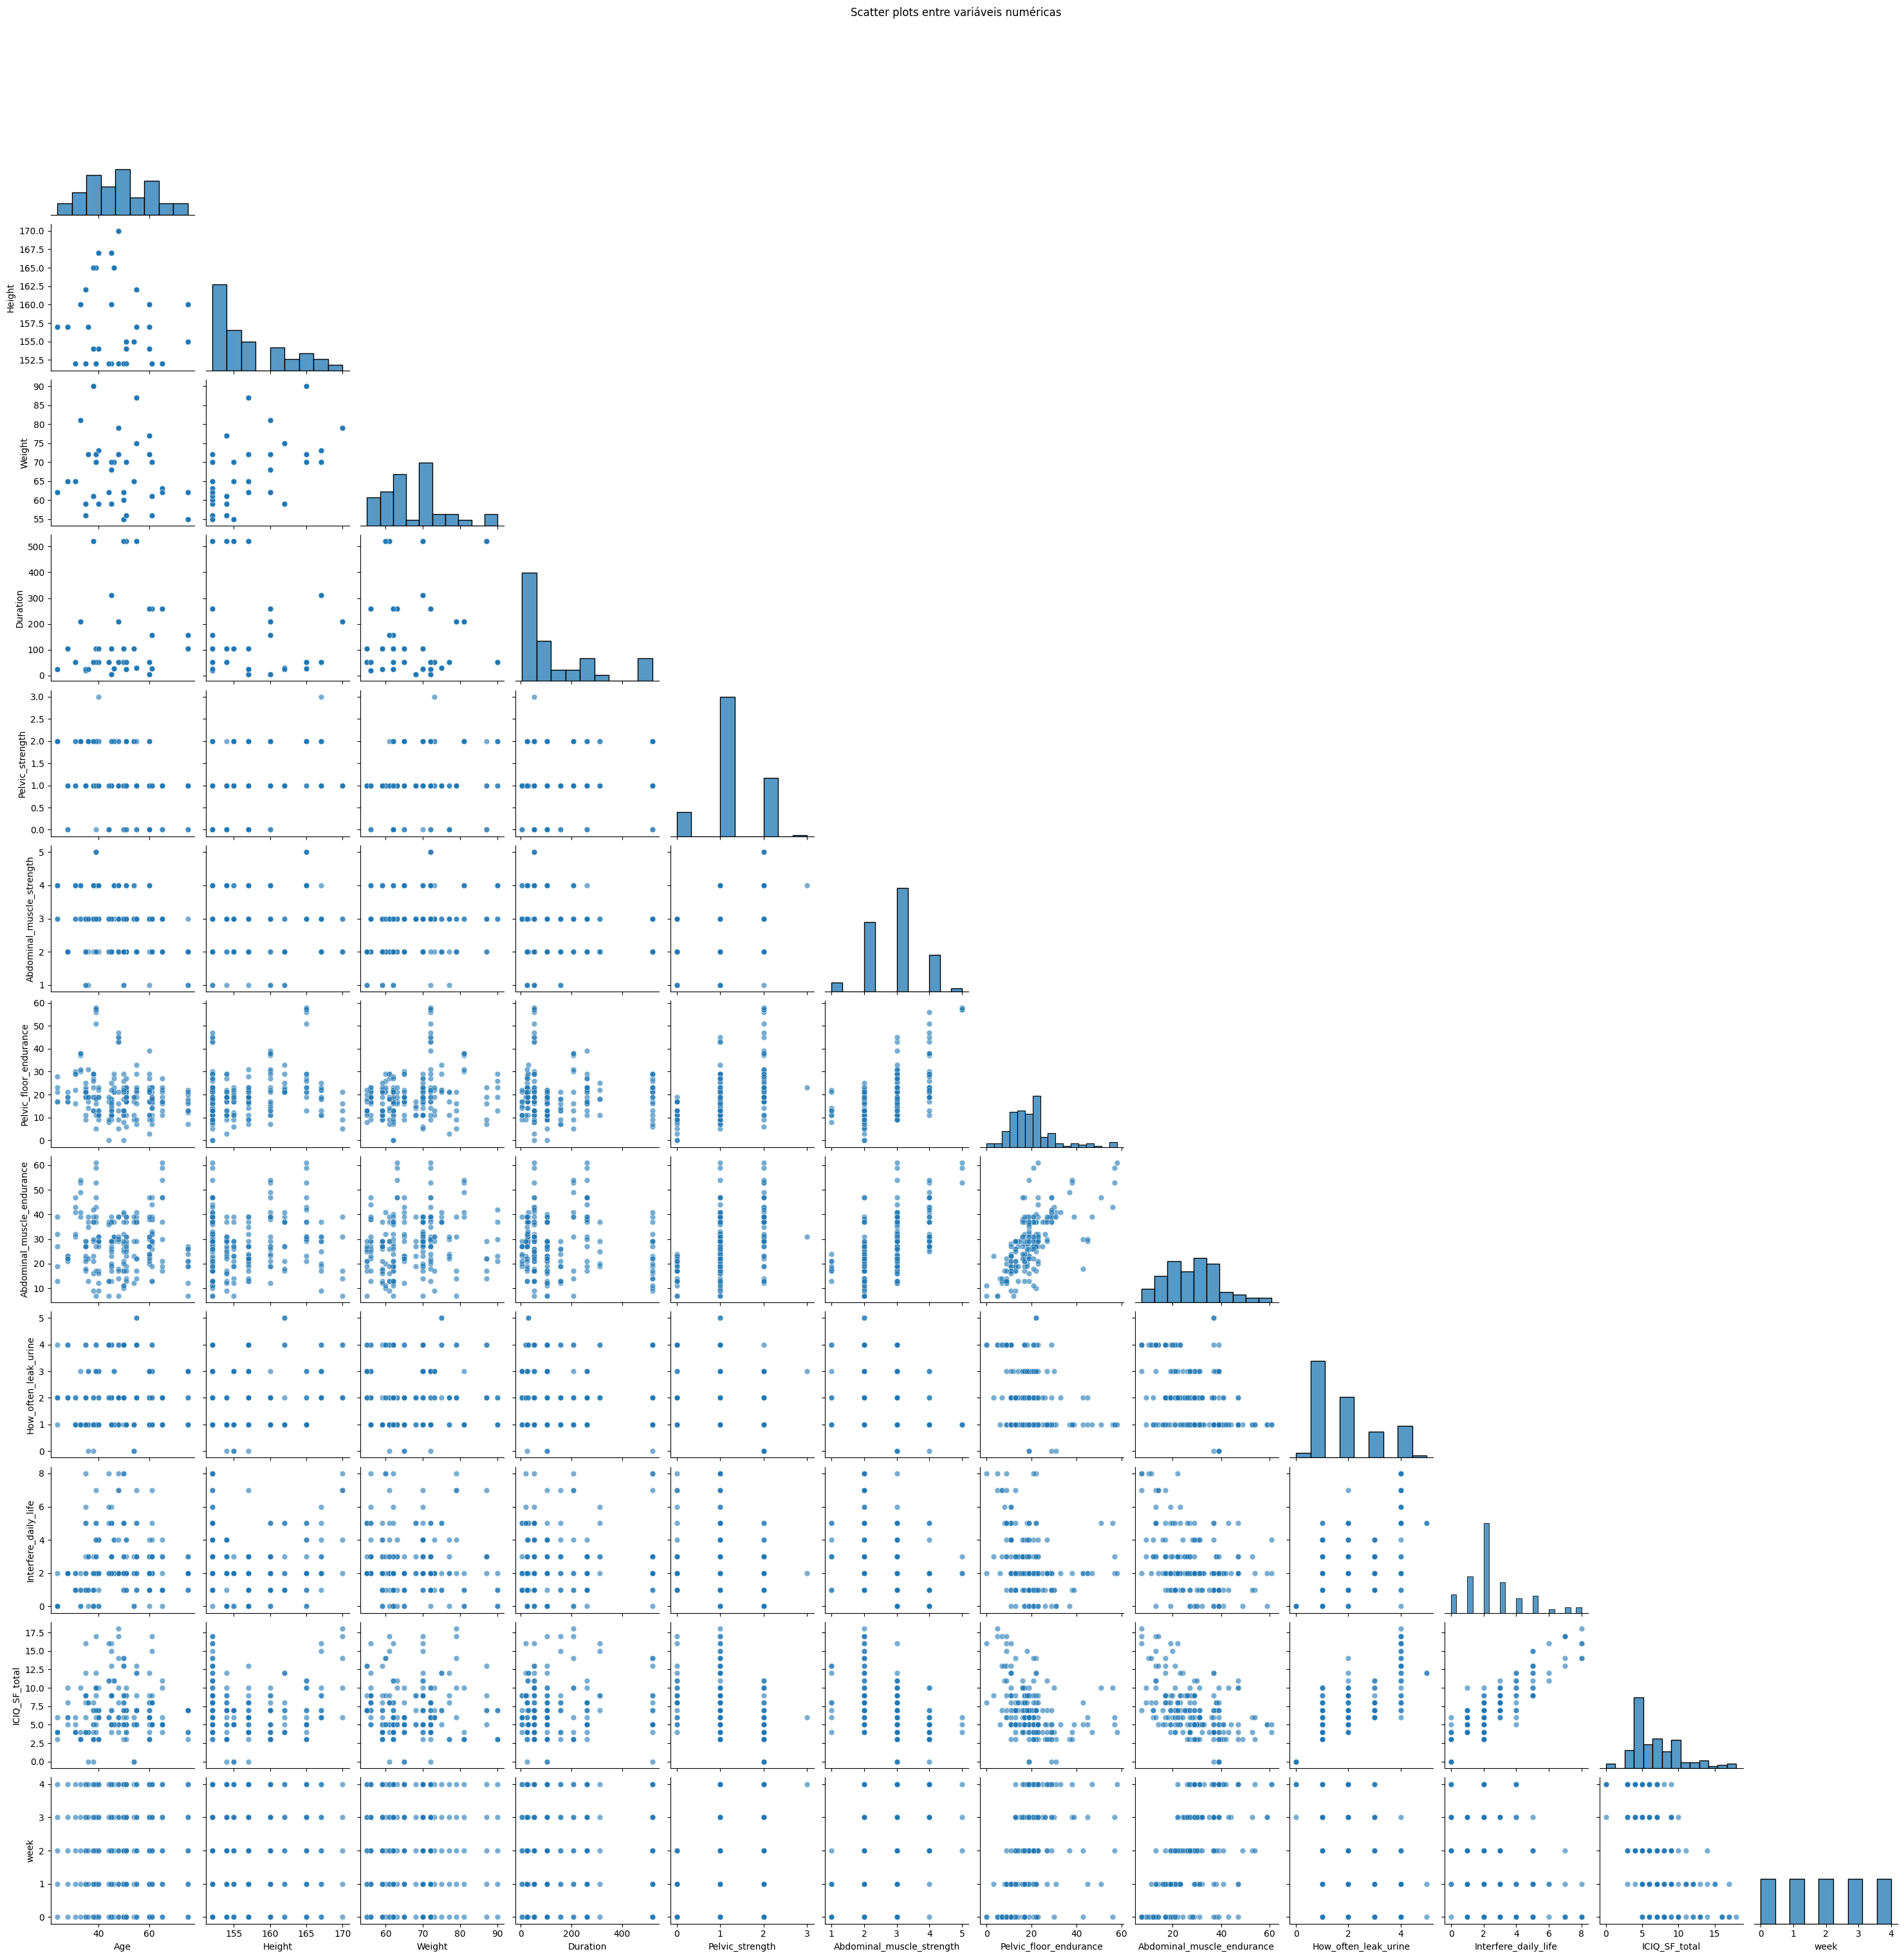

In [35]:
num_vars = [
     'Age', 'Height', 'Weight', 'Duration', 'Surgery',
       'Pelvic_strength', 'Abdominal_muscle_strength',
       'Pelvic_floor_endurance', 'Abdominal_muscle_endurance',
       'How_often_leak_urine', 'Interfere_daily_life', 'ICIQ_SF_total', 'week'
]

sns.pairplot(df[num_vars], corner=True, plot_kws={'alpha': 0.6, 's': 40})

plt.suptitle("Scatter plots entre variáveis numéricas", y=1.02)
plt.show()


Observada relação apprx. linear crescente:

 "Pelvic_floor_endurance" x "Abdominal_muscle_endurance"

 ----------------------------

 e linear decrescentes

"Abdominal_muscle_endurance X ICIQ_SF_total" e

"Pelvic_floor_endurance" e "ICIQ_SF_total"

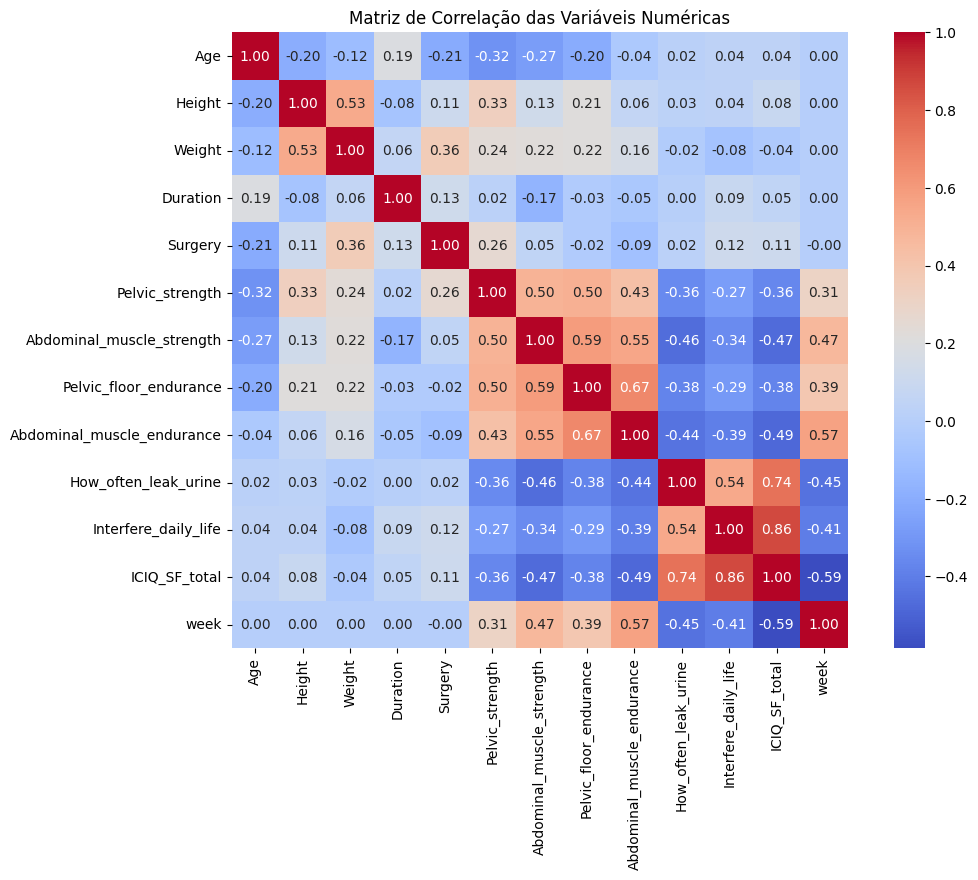

In [36]:

num_vars = [
    'Age', 'Height', 'Weight', 'Duration', 'Surgery',
    'Pelvic_strength', 'Abdominal_muscle_strength',
    'Pelvic_floor_endurance', 'Abdominal_muscle_endurance',
    'How_often_leak_urine', 'Interfere_daily_life', 'ICIQ_SF_total', 'week'
]

df_numeric = df[num_vars]

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()


# Abordagem não-temporal -> Prevendo a variável ICIQ_SF_total com regressão

Divisão em treino e teste

In [25]:
from sklearn.model_selection import train_test_split

# Suponha que você esteja prevendo a coluna 'ICIQ_SF_total' (como alvo)
# X são as features, y é a variável alvo
X = df.drop(columns=['ICIQ_SF_total','patient_id','week'])  # ou substitua pela sua variável alvo real
y = df['ICIQ_SF_total']

# Divide em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifique o tamanho de cada conjunto
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Treino: (156, 22)
Teste: (39, 22)


Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [27]:
#Para variaveis categoricas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinha as colunas (garante que X_test tenha as mesmas colunas que X_train)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [28]:
# Criar e treinar o modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Prever nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.64
R² Score: 0.93


Regressão Linear

In [30]:
from sklearn.linear_model import LinearRegression

# Inicializar o modelo
modelo_lr = LinearRegression()

# Treinar o modelo com os dados de treino
modelo_lr.fit(X_train, y_train)



LinearRegression()

In [31]:
# Fazer previsões nos dados de teste
y_pred_lr = modelo_lr.predict(X_test)


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# R² - coeficiente de determinação
r2 = r2_score(y_test, y_pred_lr)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')


MSE: 0.54
R²: 0.95


In [33]:
# Mostrar coeficientes e variáveis correspondentes
for var, coef in zip(X_train.columns, modelo_lr.coef_):
    print(f'{var}: {coef:.4f}')


Age: 0.0010
Height: 0.0140
Weight: -0.0153
Duration: 0.0004
Pelvic_strength: -0.0128
Abdominal_muscle_strength: -0.0196
Pelvic_floor_endurance: 0.0089
Abdominal_muscle_endurance: -0.0158
How_often_leak_urine: 1.1418
Interfere_daily_life: 0.9578
When_urine_leak_Leaks_when_you_cough_or_sneeze: 0.1808
When_urine_leak_Leaks_when_you_are_physically_active: 0.4168
When_urine_leak_Leaks_when_you_finished_urinating_and_dressed: 0.7553
When_urine_leak_Never_urine_does_not_leak: -1.3529
Past_medical_history_HTN: -0.0095
Past_medical_history_DM: 0.0567
Past_medical_history_More_than_one_condition: -0.0472
Urine_usually_leak_Large_amount: 2.4401
Urine_usually_leak_A_minimum_amount: -0.1014
Urine_usually_leak_A_small_amount: -0.7526
Urine_usually_leak_A_moderate_amount : 0.0000
Surgery_1: 0.1818


# Abordagem Temporal -> Previsão de séries temporais com LSTMs ou few-shot learning

Transformando o dataset em séries temporais

In [34]:
dfs_por_semana = {}

for semana in range(5):
    dfs_por_semana[semana] = df[df['week'] == semana].copy()

df_semana0 = dfs_por_semana[0]
df_semana1 = dfs_por_semana[1]
df_semana2 = dfs_por_semana[2]
df_semana3 = dfs_por_semana[3]
df_semana4 = dfs_por_semana[4]

for semana, df_semana in dfs_por_semana.items():
    print(f"Semana {semana}: {df_semana['patient_id'].nunique()} pacientes únicos, {len(df_semana)} linhas")


Semana 0: 39 pacientes únicos, 39 linhas
Semana 1: 39 pacientes únicos, 39 linhas
Semana 2: 39 pacientes únicos, 39 linhas
Semana 3: 39 pacientes únicos, 39 linhas
Semana 4: 39 pacientes únicos, 39 linhas
